In [58]:
import pandas as pd

In [59]:
d = {

'miles_per_week' : [  
    30, 45, 55, 60, 25, 70, 40, 80, 50, 35,  
    90, 65, 20, 75, 85, 33, 47, 52, 68, 29,  
    95, 78, 54, 88, 41, 53, 62, 37, 100, 82,  
    26, 49, 58, 71, 44, 92, 32, 74, 66, 39,  
    110, 85, 24, 77, 54, 48, 69, 30, 79, 31,  
    101, 72, 71, 93, 64, 55, 42, 87, 36, 96,  
    23, 84, 46, 91, 56, 99, 38, 73, 67, 34,  
    105, 59, 21, 98, 43, 86, 50, 89, 57, 27,  
    108, 70, 31, 76, 58, 94, 63, 25, 81, 33,  
    102, 83, 29, 100, 60, 53, 45, 78, 66, 37 
    
]  
,
'completed_50m' : [  
    "No", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "No",  
    "Yes", "Yes", "No", "Yes", "Yes", "No", "No", "Yes", "Yes", "No",  
    "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "Yes",  
    "No", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "No",  
    "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "No",  
    "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes",  
    "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "No",  
    "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "No",  
    "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "No",  
    "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes"  
]  
 

}

In [60]:
df = pd.DataFrame(data = d)

In [61]:
df

,miles_per_week,completed_50m
0,30,No
1,45,No
2,55,Yes
3,60,Yes
4,25,No
...,...,...
95,53,Yes
96,45,No
97,78,Yes
98,66,Yes


In [62]:
from sklearn.preprocessing import OrdinalEncoder

In [63]:
finished_race = ['No','Yes']

In [64]:
enc = OrdinalEncoder(categories = [finished_race])

In [65]:
df['completed_50m'] = enc.fit_transform(df[['completed_50m']])

In [66]:
df

,miles_per_week,completed_50m
0,30,0.0
1,45,0.0
2,55,1.0
3,60,1.0
4,25,0.0
...,...,...
95,53,1.0
96,45,0.0
97,78,1.0
98,66,1.0


In [67]:
from matplotlib import pyplot as plt

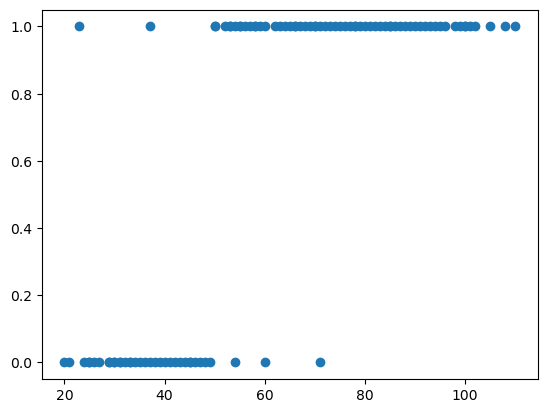

In [68]:
plt.scatter(df.miles_per_week, df.completed_50m)

In [69]:
import seaborn as sns

<Axes: xlabel='completed_50m', ylabel='count'>

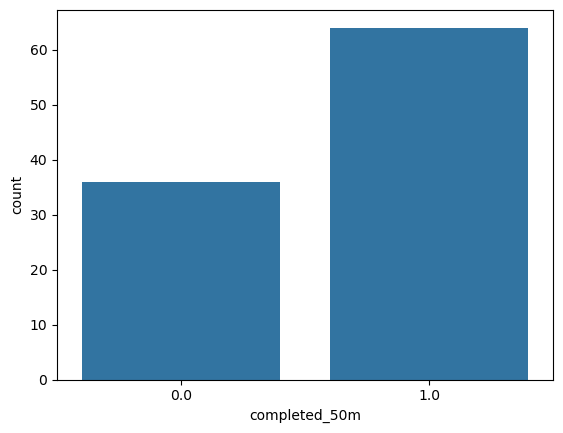

In [70]:
sns.countplot(x = 'completed_50m' , data = df)

In [71]:
X = df.iloc[: , 0:1]

In [73]:
y = df.iloc[:, 1]

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train , X_test , y_train , y_test = train_test_split(X,y ,train_size=0.8 , random_state = 11)

In [76]:
X_train.shape

(80, 1)

In [77]:
X_test.shape

(20, 1)

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
model = LogisticRegression()

In [82]:
model.fit(X_train , y_train)

LogisticRegression()

In [83]:
y_pred = model.predict(X_test)

In [84]:
model.score(X_test , y_test)

0.95

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
print(confusion_matrix (y_test , y_pred))

[[ 9  1]
 [ 0 10]]


In [87]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

